In [22]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.signal import find_peaks
from matplotlib import pyplot as plt
import seaborn as sns

from src.network import Layer
from src.ou_process import ouprocess_gaussian

sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
NUM_NEURONS = 1000 # 100
tau_V = 10
R = 1 # MOhm
EL = -70.0
V_th = -40.0
dt = 0.1 # msec
t_stop = 1.0e3 # 50.0e3

In [46]:
# Slow Signal: INPUT
input_slow, _ = ouprocess_gaussian(50.0, dt, t_stop, 1)
i_inj = 16.0 + 6.0*input_slow

In [47]:
layer = Layer(NUM_NEURONS)
layer.train(i_inj=i_inj, exp_output=i_inj, dt=dt, t_stop=t_stop)
out, V, F_binary, F_synaptic = layer.output(i_inj, dt, t_stop)

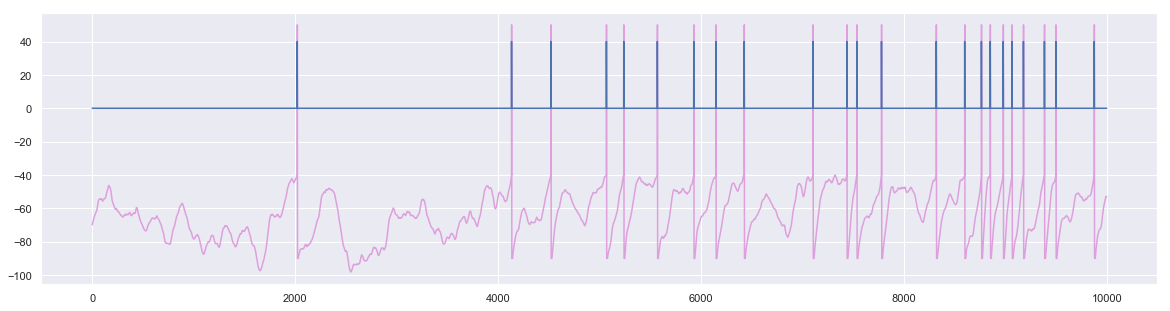

In [48]:
trial = 10
plt.figure(figsize=(20,5))
plt.plot(V[:,trial], color='plum')
plt.plot(F_binary[:,trial] * 40.0)
plt.show()

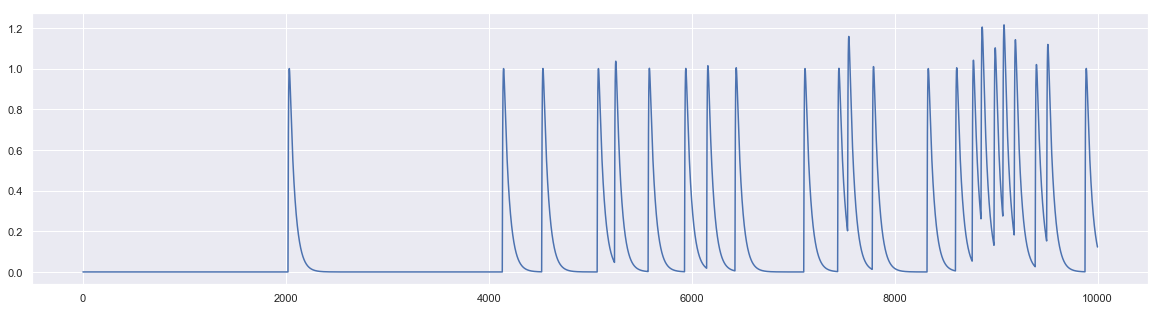

In [49]:
plt.figure(figsize=(20,5))
plt.plot(F_synaptic[:,10])

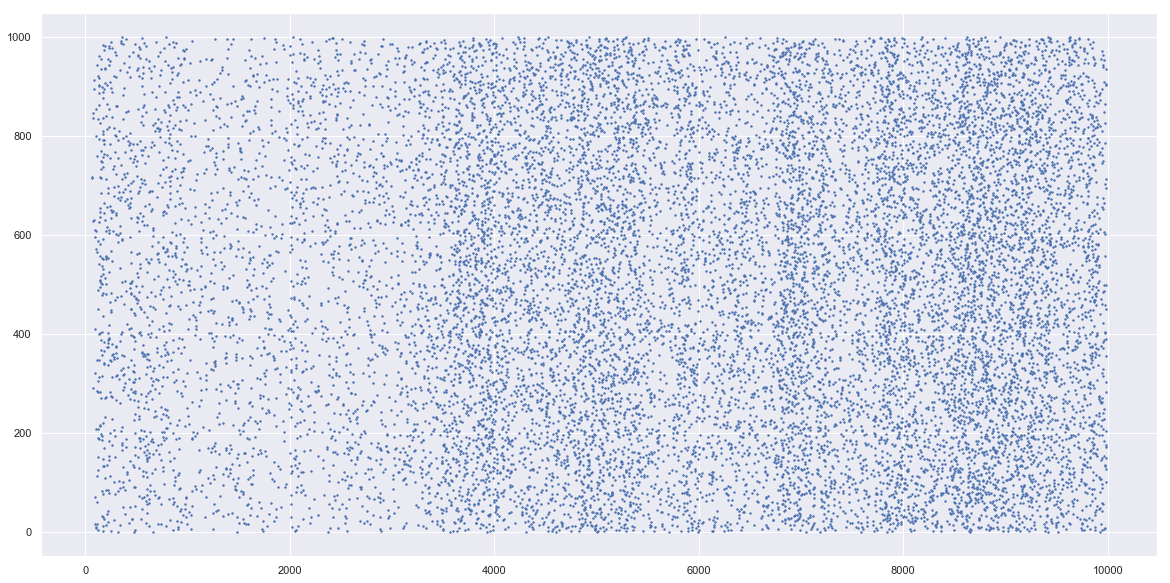

In [50]:
spike_inds, spike_trial = np.where(F_binary > 0)
plt.figure(figsize=(20,10))
plt.scatter(spike_inds, spike_trial, s=2)

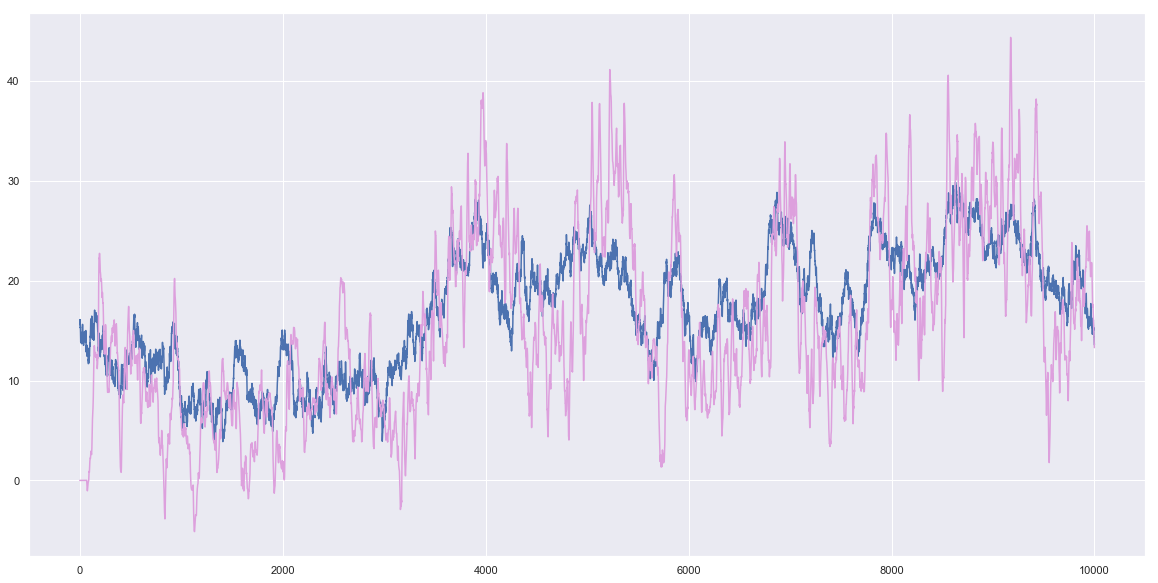

In [51]:
plt.figure(figsize=(20,10))
plt.plot(i_inj)
plt.plot(out, 'plum')

In [52]:
np.linalg.norm(out-i_inj)

642.101492951533

In [54]:
# Plotting L2 Norm between original signal and reconstructed signal
NUM_TRIALS = 100

l2_norms = np.zeros((NUM_TRIALS))

for i in range(NUM_TRIALS):
    print("Trial ", i)
    input_slow, _ = ouprocess_gaussian(50.0, dt, t_stop, 1)
    i_inj = 16.0 + 6.0*input_slow
    out, V, F_binary, F_synaptic = layer.output(i_inj, dt, t_stop)
    
    l2_norms[i] = np.linalg.norm(out-i_inj)

Trial  0
Trial  1
Trial  2
Trial  3
Trial  4
Trial  5
Trial  6
Trial  7
Trial  8
Trial  9


(array([2., 0., 2., 4., 1., 0., 0., 0., 0., 1.]),
 array([617.9327014 , 634.90360526, 651.87450912, 668.84541297,
        685.81631683, 702.78722069, 719.75812454, 736.7290284 ,
        753.69993226, 770.67083612, 787.64173997]),
 <a list of 10 Patch objects>)

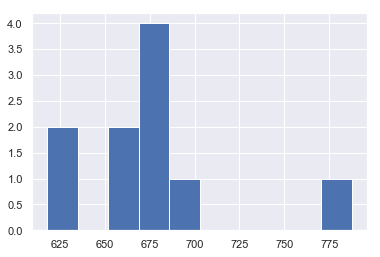

In [58]:
plt.hist(l2_norms)

In [45]:
# F_binary = np.zeros((tt.shape[0], NUM_NEURONS))
# avg_firing_rate = np.zeros(NUM_NEURONS)
# a2 = 25.0 # pA; std of noise

# I_total = a2*ETA + i_inj

# for k in range(0, NUM_NEURONS):
#     V[:,k] = lif_compute(I_total[:, k], R, tau_V, V_th, dt)

NameError: name 'tt' is not defined